<a href="https://colab.research.google.com/github/EasyTechp5/30-Day-SQL-Challenge/blob/main/python/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

### **Import library**

In [1]:
from sklearn import datasets

### **Load dataset**

In [2]:
diabetes = datasets.load_diabetes()

In [9]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### **Description of the Diabetes dataset**

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### **Feature names**

In [5]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **Create X and Y data matrices**

In [6]:
X = diabetes.data
Y = diabetes.target

In [7]:
X.shape, Y.shape

((442, 10), (442,))

### **Load dataset + Create X and Y data matrices (in 1 step)**

In [8]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [9]:
X.shape, Y.shape

((442, 10), (442,))

## **Load the Boston Housing dataset (via GitHub)**

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

```
library(mlbench)
data(BostonHousing)
```

For your convenience, I have also shared the [Boston Housing dataset](https://github.com/dataprofessor/data/blob/master/BostonHousing.csv) on the Data Professor GitHub package.

### **Import library**

In [3]:
import pandas as pd

### **Download CSV from GitHub**

In [1]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2025-03-25 16:02:56--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2025-03-25 16:02:56--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.006s  

2025-03-25 16:02:56 (6.22 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



### **Read in CSV file**

In [4]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **Split dataset to X and Y variables**

In [5]:
Y = BostonHousing.medv
Y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## **Data split**

### **Import library**

In [9]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [11]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [12]:
X_test.shape, Y_test.shape

((102, 13), (102,))

## **Linear Regression Model**

### **Import library**

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [14]:
model = linear_model.LinearRegression()

#### Build training model

In [16]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply trained model to make prediction (on test set)

In [17]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [18]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-9.88130064e-02  5.64435788e-02  9.84862183e-03  1.81984692e+00
 -1.88922021e+01  3.63770675e+00  2.42133216e-03 -1.62991616e+00
  2.92181033e-01 -1.25878183e-02 -9.37965267e-01  8.00479616e-03
 -5.34526595e-01]
Intercept: 39.16560120279097
Mean squared error (MSE): 18.91
Coefficient of determination (R^2): 0.78


### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [19]:
r2_score(Y_test, Y_pred)

0.7836204565747393

In [21]:
# r2_score(Y_test, Y_pred).dtype

We will be using the modulo operator to format the numbers by rounding it off.

In [38]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [39]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [40]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [22]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [23]:
Y_test

,medv
353,30.1
387,7.4
148,17.8
195,50.0
244,17.6
...,...
461,17.7
57,31.6
105,19.5
131,19.6


In [24]:
import numpy as np
np.array(Y_test)

array([30.1,  7.4, 17.8, 50. , 17.6, 15.6, 15.6, 23.5, 19.3, 34.9, 20. ,
       15.3, 19.4, 20.3, 27.5, 21.4, 17.2, 11.5, 17.8, 41.7, 18.2, 16.2,
       23.9, 10.2, 22.5, 12.5, 32.5, 22.9, 15.6, 27.9, 14.5, 50. , 21.7,
       30.3, 23. , 31.5, 21. , 13.4, 28.7, 46. , 20.6, 18.5, 12.6, 19.9,
       10.4,  7.2, 13.5, 34.7, 19.7, 24.4, 42.8, 22.9, 20.9, 14.5, 21.7,
       23. , 10.4, 21.1,  8.1, 22.5, 20.8, 24.5, 13.3, 32.7, 19.1, 29.6,
        7. , 22.2, 10.5, 27. , 13.3, 20.1, 18.3, 18.7, 19.1, 14. , 26.2,
       21.7, 16.4, 23.9, 13.8, 50. , 20.6, 20.6, 24.3, 18.6, 22.3, 50. ,
       29.1, 11. , 29. , 20.7, 13.4, 35.1, 18.5, 20.1, 18. , 17.7, 31.6,
       19.5, 19.6, 31.2])

In [25]:
Y_pred

array([25.14837659,  5.57636794,  9.59190944, 41.25006627, 16.14355076,
       15.6650129 , 13.48641743, 30.84597693, 20.90248845, 34.75293993,
       18.09915721, 19.30197687, 26.07031545, 22.36261952, 14.5818403 ,
       23.86340496, 13.72171057, 14.0580564 , 17.56483303, 37.76148731,
       19.2909986 , 15.32721172, 24.73968719, 16.71386548, 22.20694148,
       18.97552939, 31.31822739, 20.28858195, 11.98528679, 32.53703807,
       18.34750313, 44.30999216, 21.35791051, 32.94625541, 23.45200731,
       32.52297461, 23.18710098, 13.41199827, 30.90786988, 39.38504871,
       27.36648371, 13.12082764, 17.77794292, 17.53089002,  7.23929957,
        7.9576817 , 13.92671862, 30.39371159, 21.12799103, 22.58261984,
       29.09409272, 22.8199748 , 21.86413596, 18.1257023 , 20.77969848,
       20.08417609, 14.79633299, 22.5384506 ,  3.75629836, 29.31037217,
       18.61004709, 27.71567574, 15.95828411, 30.19731803, 16.73709129,
       24.30107047,  8.29386913, 23.79472405, 12.52790952, 32.02

#### Making the scatter plot

In [26]:
sns.scatterplot(Y_test, Y_pred)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [54]:
sns.scatterplot(Y_test, Y_pred, marker="+")

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

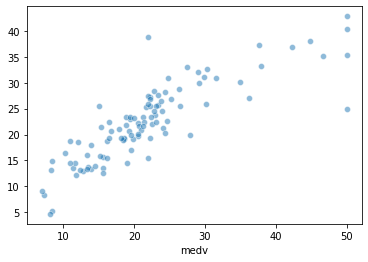

In [ ]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)